In [1]:
from ssm.models import SLDS
from ssm.emissions import GaussianIdentityEmissions
from ssm.variational import SLDSMeanFieldVariationalPosterior, SLDSTriDiagVariationalPosterior
import numpy as np
import scipy.io
from pybasicbayes.util.text import progprint_xrange
import matplotlib.pyplot as plt
from ssm.util import random_rotation, find_permutation

ModuleNotFoundError: No module named 'ssm'

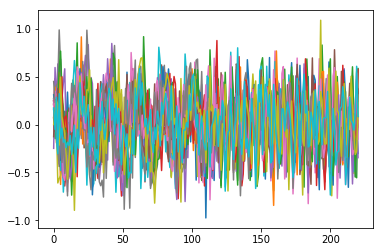

In [7]:
data = scipy.io.loadmat("test_data_N_20_M_221_sigma_0.200000.mat")
X = data['X']
plt.plot(X.T)
plt.show()

In [8]:
N = X.shape[0]
Kmax = 2 # number of hidden states
r = 6 #X.shape[0]

In [10]:
slds = SLDS(N, Kmax, r)
slds.initialize(X.T)

Initializing with an ARHMM using 25 steps of EM.


In [15]:
q_mf = SLDSMeanFieldVariationalPosterior(slds, X.T)
q_mf_elbos = slds.fit(q_mf, X.T, num_iters=1000, initialize=False)
q_mf_x = q_mf.mean[0]
#q_mf_y = slds.smooth(q_mf_x, X.T)

In [50]:
T = len(pred_states)
true_states = np.array([0 if i < T/2 else 1 for i in range(T)])

slds.permute(find_permutation(true_states, slds.most_likely_states(q_mf_x, X.T)))
pred_states = slds.most_likely_states(q_mf_x, X.T)
print(pred_states)

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
A_r = slds.dynamics.As
b_r = slds.dynamics.bs
Cs = slds.emissions.Cs[0]

In [35]:
A_1 = Cs @ A_r[0] @ np.linalg.pinv(Cs)
A_2 = Cs @ A_r[1] @ np.linalg.pinv(Cs)

In [42]:
np.linalg.norm(data['A1'] - A_1, 2)

1.198044643876564

In [45]:
len(pred_states)

221

In [49]:
help(find_permutation)

Help on function find_permutation in module ssm.util:

find_permutation(z1, z2, K1=None, K2=None)

